In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
data_size = 1000

In [3]:
data = np.random.rand(data_size, 3) * 5
data[:,-1] = (data[:,0] + data[:,1]) > 5
data[:10]

array([[ 2.67139007,  3.5555282 ,  1.        ],
       [ 0.63018722,  1.77471937,  0.        ],
       [ 2.37036743,  0.61290964,  0.        ],
       [ 1.68742902,  1.61183001,  0.        ],
       [ 3.12475704,  2.89871308,  1.        ],
       [ 2.0255142 ,  1.4427925 ,  0.        ],
       [ 1.91343218,  3.24134497,  1.        ],
       [ 3.04895401,  3.66658402,  1.        ],
       [ 0.41321449,  1.37953095,  0.        ],
       [ 2.79601393,  4.67004021,  1.        ]])

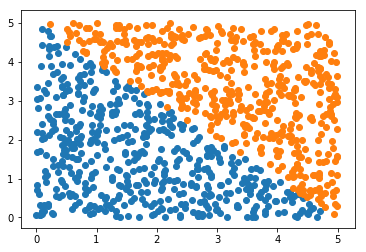

In [4]:
plt.scatter(data[data[:,2] == 0,0], data[data[:,2] == 0,1])
plt.scatter(data[data[:,2] == 1,0], data[data[:,2] == 1,1], color='C1')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0:2], data[:,2], test_size=0.3))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), kernel_initializer='uniform', activation='sigmoid'))
optimizer = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3723
Epoch 2/10
700/700 [==============================] - 1s 1ms/step - loss: 0.2089
Epoch 3/10
700/700 [==============================] - 1s 2ms/step - loss: 0.1593
Epoch 4/10
700/700 [==============================] - 1s 847us/step - loss: 0.1465
Epoch 5/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1351
Epoch 6/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1194
Epoch 7/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1125
Epoch 8/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1013
Epoch 9/10
700/700 [==============================] - 1s 890us/step - loss: 0.1036
Epoch 10/10
700/700 [==============================] - 1s 819us/step - loss: 0.1030


In [8]:
print(model.evaluate(x_test, y_test, batch_size=1))

300/300 [==============================] - 0s 989us/step
0.0821224817397


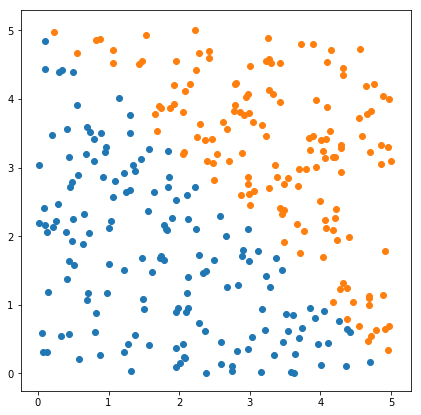

In [9]:
plt.figure(figsize=(7,7))
y_predict = model.predict(x_test).reshape(-1)
y_predict = y_predict < 0.5
plt.scatter(x_test[y_predict, 0], x_test[y_predict, 1])
plt.scatter(x_test[y_predict == False, 0], x_test[y_predict == False, 1], color='C1')
plt.show()

In [10]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 3.95988703],
       [ 3.80109286]], dtype=float32), array([-19.83564949], dtype=float32)]


In [11]:
y_predict = model.predict(x_test).reshape(-1)
np.set_printoptions(precision=2, suppress=True)
print(y_predict)

[ 0.93  0.15  0.05  1.    0.54  0.    0.1   0.96  0.89  0.49  0.    1.    1.
  0.1   0.    0.03  1.    0.78  0.92  0.01  0.    0.    0.    0.01  0.    0.9
  0.99  0.    0.04  0.32  1.    0.07  0.    1.    0.    0.    0.01  0.08
  0.01  1.    0.    1.    1.    0.93  0.87  1.    0.03  0.13  0.    0.97
  1.    0.01  0.71  0.    0.    1.    0.99  1.    0.    0.99  1.    1.
  0.94  1.    0.49  0.    0.05  0.01  0.01  0.61  0.98  0.    0.    1.
  0.91  0.02  1.    0.65  0.99  0.    0.48  0.    1.    0.    0.01  0.    0.
  0.12  0.    0.94  1.    0.    0.87  0.91  0.99  0.17  0.5   1.    0.01
  0.99  0.28  0.    1.    0.92  0.98  0.82  1.    0.12  1.    0.99  1.    1.
  0.    1.    1.    0.    0.    1.    0.    1.    0.95  0.91  0.48  0.02
  0.9   0.74  0.91  0.04  0.01  0.    0.01  0.01  1.    1.    0.    0.05
  0.37  0.    0.    1.    1.    0.99  1.    1.    1.    1.    0.    0.86
  0.01  1.    0.17  1.    0.    0.33  0.02  1.    0.23  1.    0.01  0.01
  0.    0.    0.45  0.    0.01  1.    

In [12]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [13]:
print("%0.2f" % sigmoid(2.5 * 4.14 + 2.5 * 3.98 + -20.27))

0.51
